### DATA PT14-extra - Proyecto final - Grupo 3
#### Control de calidad de los datos del archivo Google Maps metadata_sitios de los estados de California (CA) y Nevada (NV)

In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
carpeta = r'C:\Users\gonza\OneDrive\Desktop\Proyecto Grupal Henry\Maps\metadata-sitios'

In [3]:
# # Obtener la lista de archivos JSON en carpeta
# archivos_json = glob.glob(os.path.join(carpeta, "*.json"))

# # Función para leer un JSON individualmente
# def leer_json(archivo):
#     return pd.read_json(archivo, lines=True)

# # Usar múltiples hilos para leer los archivos más rápido
# with ThreadPoolExecutor() as executor:
#     df_list = list(executor.map(leer_json, archivos_json))

# # Concatenar los DataFrames en uno solo
# metadata_sitios = pd.concat(df_list, ignore_index=True)

# metadata_sitios.head()

In [3]:
# Obtener la lista de archivos JSON en carpeta
archivos_json = glob.glob(os.path.join(carpeta, "*.json"))

In [4]:
# Se guardará archivos JSON en formato pickle (binario) el cual es más rápido para futuras consultas
for archivo in archivos_json:
    df = pd.read_json(archivo, lines=True)
    df.to_pickle(archivo.replace(".json", ".pkl"))  # Guardar como .pkl

In [5]:
# Carga los archivos Pickle generados y los combina en un solo DataFrame.
df_list = [pd.read_pickle(archivo.replace(".json", ".pkl")) for archivo in archivos_json] # convierte el nombre de cada archivo de .json a .pkl para cargarlo correctamente.
metadata_sitio = pd.concat(df_list, ignore_index=True)

metadata_sitio.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


In [6]:
# Eliminamos columnas que no serán utilizadas

metadata_sitio = metadata_sitio.drop(columns=['price', 'hours', 'MISC', 'state', 'relative_results', 'url'])

In [7]:
metadata_sitio.columns

Index(['name', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews'],
      dtype='object')

In [8]:
metadata_sitio.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7


In [9]:
metadata_sitio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025011 entries, 0 to 3025010
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   name            object 
 1   address         object 
 2   gmap_id         object 
 3   description     object 
 4   latitude        float64
 5   longitude       float64
 6   category        object 
 7   avg_rating      float64
 8   num_of_reviews  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 207.7+ MB


In [10]:
# reviso que categorias hay. Busco los restaurantes de pizza
# df_mt_sitios['category'].unique()
unique_categories = pd.DataFrame(metadata_sitio["category"].explode().unique() )

In [11]:
unique_categories.head()

,0
0,Pharmacy
1,Textile exporter
2,Korean restaurant
3,Fabric store
4,Restaurant


In [12]:
unique_resto = unique_categories[unique_categories[0].str.lower().str.contains("restaurant", na=False)]
unique_resto

,0
2,Korean restaurant
4,Restaurant
8,Health food restaurant
184,Buffet restaurant
238,Fast food restaurant
...,...
4416,Chettinad restaurant
4418,Sfiha restaurant
4433,Mutton barbecue restaurant
4452,Steamboat restaurant


In [13]:
print(unique_resto.to_string())

                                         0
2                        Korean restaurant
4                               Restaurant
8                   Health food restaurant
184                      Buffet restaurant
238                   Fast food restaurant
310                      Family restaurant
311                     Seafood restaurant
338                   Dominican restaurant
356                        Taco restaurant
412                     Mexican restaurant
448                     Restaurant or cafe
491                   Breakfast restaurant
492                       Lunch restaurant
603                       Asian restaurant
604                     Hot pot restaurant
605                     Chinese restaurant
640               Mediterranean restaurant
670                     Takeout Restaurant
730                     Italian restaurant
734                       Ramen restaurant
743                    American restaurant
745               Modern French restaurant
811        

In [14]:
metadata_sitio.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7


In [17]:
# selecciono las filas que tienen pizza restaurant
# df_mt_sitios_pizza = df_mt_sitios[df_mt_sitios['category'].apply(lambda x: 'Pizza restaurant' in x)]
# TypeError: argument of type 'NoneType' is not iterable

df_mt_sitios_pizza = metadata_sitio[metadata_sitio['category'].apply(lambda x: isinstance(x, list) and 'Pizza restaurant' in x)]

In [18]:
df_mt_sitios_pizza.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23814 entries, 1045 to 3025005
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            23814 non-null  object 
 1   address         23787 non-null  object 
 2   gmap_id         23814 non-null  object 
 3   description     12236 non-null  object 
 4   latitude        23814 non-null  float64
 5   longitude       23814 non-null  float64
 6   category        23814 non-null  object 
 7   avg_rating      23814 non-null  float64
 8   num_of_reviews  23814 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 1.8+ MB


Hay 23814 pizza restaurants. Solo 23787 tienen direccion.

In [19]:
# la columna address tiene datos de nombre, direccion, localidad, codigo postal y estado
# pongo cada datos en una columna distinta porque puedo necesitarlos mas adelante
print(df_mt_sitios_pizza['address'].iloc[0])
print(df_mt_sitios_pizza['address'].iloc[5])
print(df_mt_sitios_pizza['address'].iloc[10])
print(df_mt_sitios_pizza['address'].iloc[15])

Sir Pizza Xpress, 201 E Broad St, Smithville, TN 37166
Sgambati's New York Pizza, 2725 Manitowoc Rd, Green Bay, WI 54311
Higgy's Pizza, 4104 KY-3630, Annville, KY 40402
Alpine Pizza, 1104 U.S. 9, Schroon Lake, NY 12870


In [20]:
# Extract state (two uppercase letters) using regex
df_mt_sitios_pizza['state'] = df_mt_sitios_pizza['address'].str.extract(r',\s*([A-Z]{2})\s*\d{5}') 

In [21]:
df_mt_sitios_pizza['state'].unique()

array(['TN', 'CO', 'MI', 'MA', 'MN', 'WI', 'AZ', 'NY', 'GA', 'KY', 'MD',
       'AL', 'FL', 'CA', 'OR', 'PA', 'ID', 'TX', 'NJ', 'NC', 'ME', 'MO',
       'WA', 'OH', 'NV', 'CT', 'AR', 'IN', 'DE', 'IL', 'NE', 'DC', 'UT',
       'WY', 'OK', 'MT', 'VA', 'SC', 'IA', 'WV', 'LA', 'ND', 'MS', 'VT',
       'KS', 'SD', 'RI', 'NH', 'HI', 'NM', nan, 'AK'], dtype=object)

In [22]:
# veo cuantas pizzerias hay por estado. seleccionaremos las de CA y NV. Por ser estados limitrofes
df_mt_sitios_pizza.groupby('state').count()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews
state,,,,,,,,,
AK,63,63,63,31,63,63,63,63,63
AL,239,239,239,165,239,239,239,239,239
AR,177,177,177,116,177,177,177,177,177
AZ,325,325,325,204,325,325,325,325,325
CA,2192,2192,2192,1357,2192,2192,2192,2192,2192
CO,369,369,369,231,369,369,369,369,369
CT,517,517,517,153,517,517,517,517,517
DC,69,69,69,49,69,69,69,69,69
DE,85,85,85,38,85,85,85,85,85


Hay datos de 2192 pizzerias en CA y 209 en NV

In [23]:
# selecciono las pizzerias de CA y NV
df_mt_pizza_CANV = df_mt_sitios_pizza[df_mt_sitios_pizza['state'].isin(['CA', 'NV'])]

In [24]:
# Split address into components
df_mt_pizza_CANV[['street_address', 'city', 'state_zip']] = df_mt_pizza_CANV['address'].str.rsplit(", ", n=2, expand=True)

In [25]:
# Split state and zip code
df_mt_pizza_CANV[['state', 'zip_code']] = df_mt_pizza_CANV['state_zip'].str.split(" ", n=1, expand=True)

In [26]:
# Drop the intermediate column
df_mt_pizza_CANV.drop(columns=['state_zip'], inplace=True)

In [27]:
df_mt_pizza_CANV.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2401 entries, 6738 to 3023082
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2401 non-null   object 
 1   address         2401 non-null   object 
 2   gmap_id         2401 non-null   object 
 3   description     1468 non-null   object 
 4   latitude        2401 non-null   float64
 5   longitude       2401 non-null   float64
 6   category        2401 non-null   object 
 7   avg_rating      2401 non-null   float64
 8   num_of_reviews  2401 non-null   int64  
 9   state           2401 non-null   object 
 10  street_address  2401 non-null   object 
 11  city            2401 non-null   object 
 12  zip_code        2401 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 262.6+ KB


In [28]:
# renombro y reordeno las columnas
df_mt_pizza_CANV.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,state,street_address,city,zip_code
6738,PIZZA ROW RECORDS,"PIZZA ROW RECORDS, 433 E 7th St, Los Angeles, ...",0x80c2c7726b53b8e5:0xad288d11654f5e48,None,34.041406,-118.247477,[Pizza restaurant],4.3,34,CA,"PIZZA ROW RECORDS, 433 E 7th St",Los Angeles,90014
9310,Scarantino's Sports Bar & Grill,"Scarantino's Sports Bar & Grill, 23862 Bridger...",0x80dce8f179fcb781:0x6bed690d92392f3a,None,33.616412,-117.707317,"[Italian restaurant, Breakfast restaurant, Piz...",4.0,8,CA,"Scarantino's Sports Bar & Grill, 23862 Bridger Rd",Lake Forest,92630
15388,Domino's Pizza,"Domino's Pizza, 6540 E Lake Mead Blvd, Las Veg...",0x80c8dd7678249c49:0x6f2556114030dded,None,36.196051,-115.030257,"[Pizza delivery, Delivery Restaurant, Takeout ...",3.7,8,NV,"Domino's Pizza, 6540 E Lake Mead Blvd",Las Vegas,89156
23865,Danny Boy's Famous Original Pizza,"Danny Boy's Famous Original Pizza, 330 S Hope ...",0x80c2c7d5279490eb:0x4374ad061c2c67de,None,34.052914,-118.252486,[Pizza restaurant],5.0,7,CA,"Danny Boy's Famous Original Pizza, 330 S Hope St",Los Angeles,90071
24711,Piara Pizza,"Piara Pizza, 3131 N Maroa Ave, Fresno, CA 93704",0x809467352f2ce435:0x9d7881ae2a25c1b0,None,36.779041,-119.800262,"[Pizza restaurant, Pizza Takeout, Restaurant]",4.3,26,CA,"Piara Pizza, 3131 N Maroa Ave",Fresno,93704


In [29]:
# Extract everything after the first comma and strip any extra spaces
df_mt_pizza_CANV['cleaned_address'] = df_mt_pizza_CANV['street_address'].str.split(", ", n=1).str[1]

# Drop the original column if necessary
df_mt_pizza_CANV.drop(columns=['address', 'street_address', 'description', 'category'], inplace=True)


In [30]:
df_mt_pizza_CANV.head()

,name,gmap_id,latitude,longitude,avg_rating,num_of_reviews,state,city,zip_code,cleaned_address
6738,PIZZA ROW RECORDS,0x80c2c7726b53b8e5:0xad288d11654f5e48,34.041406,-118.247477,4.3,34,CA,Los Angeles,90014,433 E 7th St
9310,Scarantino's Sports Bar & Grill,0x80dce8f179fcb781:0x6bed690d92392f3a,33.616412,-117.707317,4.0,8,CA,Lake Forest,92630,23862 Bridger Rd
15388,Domino's Pizza,0x80c8dd7678249c49:0x6f2556114030dded,36.196051,-115.030257,3.7,8,NV,Las Vegas,89156,6540 E Lake Mead Blvd
23865,Danny Boy's Famous Original Pizza,0x80c2c7d5279490eb:0x4374ad061c2c67de,34.052914,-118.252486,5.0,7,CA,Los Angeles,90071,330 S Hope St
24711,Piara Pizza,0x809467352f2ce435:0x9d7881ae2a25c1b0,36.779041,-119.800262,4.3,26,CA,Fresno,93704,3131 N Maroa Ave


In [31]:
# renombro y reordeno las columnas
df_mt_pizza_CANV.rename(columns={'name': 'business_name', 'cleaned_address': 'address'}, inplace=True)

In [32]:
cols = df_mt_pizza_CANV.columns.tolist()
cols

['business_name',
 'gmap_id',
 'latitude',
 'longitude',
 'avg_rating',
 'num_of_reviews',
 'state',
 'city',
 'zip_code',
 'address']

In [33]:
cols = ['gmap_id', 'business_name', 'address' , 'city', 'state', 'zip_code',  'latitude', 'longitude', 'avg_rating', 'num_of_reviews']
df_mt_pizza_CANV = df_mt_pizza_CANV[cols] 
df_mt_pizza_CANV.head()

,gmap_id,business_name,address,city,state,zip_code,latitude,longitude,avg_rating,num_of_reviews
6738,0x80c2c7726b53b8e5:0xad288d11654f5e48,PIZZA ROW RECORDS,433 E 7th St,Los Angeles,CA,90014,34.041406,-118.247477,4.3,34
9310,0x80dce8f179fcb781:0x6bed690d92392f3a,Scarantino's Sports Bar & Grill,23862 Bridger Rd,Lake Forest,CA,92630,33.616412,-117.707317,4.0,8
15388,0x80c8dd7678249c49:0x6f2556114030dded,Domino's Pizza,6540 E Lake Mead Blvd,Las Vegas,NV,89156,36.196051,-115.030257,3.7,8
23865,0x80c2c7d5279490eb:0x4374ad061c2c67de,Danny Boy's Famous Original Pizza,330 S Hope St,Los Angeles,CA,90071,34.052914,-118.252486,5.0,7
24711,0x809467352f2ce435:0x9d7881ae2a25c1b0,Piara Pizza,3131 N Maroa Ave,Fresno,CA,93704,36.779041,-119.800262,4.3,26


Reviso duplicados, nulos. Outliers en las columnas latitude, longitude,	avg_rating,	num_of_reviews
Vi que en algunas columnas la latitud y la longitud no estaban bien

In [34]:
# reviso duplicados
df_dup = df_mt_pizza_CANV[df_mt_pizza_CANV.duplicated(subset=['gmap_id'], keep=False)]
df_dup = df_dup.sort_values(['gmap_id'])

print(df_dup)


                                     gmap_id  \
24711  0x809467352f2ce435:0x9d7881ae2a25c1b0   
51284  0x809467352f2ce435:0x9d7881ae2a25c1b0   
26143  0x80c2971865b00631:0x1d360a4bfe47e631   
52716  0x80c2971865b00631:0x1d360a4bfe47e631   
6738   0x80c2c7726b53b8e5:0xad288d11654f5e48   
33311  0x80c2c7726b53b8e5:0xad288d11654f5e48   
23865  0x80c2c7d5279490eb:0x4374ad061c2c67de   
50438  0x80c2c7d5279490eb:0x4374ad061c2c67de   
15388  0x80c8dd7678249c49:0x6f2556114030dded   
41961  0x80c8dd7678249c49:0x6f2556114030dded   
9310   0x80dce8f179fcb781:0x6bed690d92392f3a   
35883  0x80dce8f179fcb781:0x6bed690d92392f3a   

                           business_name                address         city  \
24711                        Piara Pizza       3131 N Maroa Ave       Fresno   
51284                        Piara Pizza       3131 N Maroa Ave       Fresno   
26143   Chit Chat Restaurant Cafe Lounge     7115 Van Nuys Blvd     Van Nuys   
52716   Chit Chat Restaurant Cafe Lounge     7115 Van N

In [35]:
df_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 24711 to 35883
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gmap_id         12 non-null     object 
 1   business_name   12 non-null     object 
 2   address         12 non-null     object 
 3   city            12 non-null     object 
 4   state           12 non-null     object 
 5   zip_code        12 non-null     object 
 6   latitude        12 non-null     float64
 7   longitude       12 non-null     float64
 8   avg_rating      12 non-null     float64
 9   num_of_reviews  12 non-null     int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 1.0+ KB


In [36]:
# elimino los duplicados manteniendo la primera instancia
df_mt_pizza_CANV_sindup = df_mt_pizza_CANV.drop_duplicates(subset=['gmap_id'], keep='first')

Hay datos de 12 pizzerias duplicados. Los elimino

In [37]:
df_mt_pizza_CANV_sindup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2395 entries, 6738 to 3023082
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gmap_id         2395 non-null   object 
 1   business_name   2395 non-null   object 
 2   address         2387 non-null   object 
 3   city            2395 non-null   object 
 4   state           2395 non-null   object 
 5   zip_code        2395 non-null   object 
 6   latitude        2395 non-null   float64
 7   longitude       2395 non-null   float64
 8   avg_rating      2395 non-null   float64
 9   num_of_reviews  2395 non-null   int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 205.8+ KB


Hay 8 locales sin direccion pero tienen ciudad, estado, latitud y longitud. No los elimino </br>
Reviso si hay Outliers en las columnas latitude, longitude,	avg_rating,	num_of_reviews

min,  1.0
max,  5.0
mean,  4.080835073068893


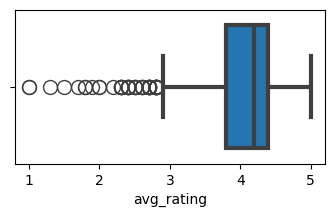

In [38]:
plt.figure(figsize=(4, 2))
sns.boxplot(x = 'avg_rating', data = df_mt_pizza_CANV_sindup,
            fliersize = 10, # Outlier size
            linewidth = 3,  # Lines width
            saturation = 0.95) # Fill color saturation

# reviso valor maximo y minimo. Creo que estan en el rango correcto
print('min, ', df_mt_pizza_CANV_sindup['avg_rating'].min())
print('max, ', df_mt_pizza_CANV_sindup['avg_rating'].max())
print('mean, ', df_mt_pizza_CANV_sindup['avg_rating'].mean())

avg_rating. Rango 1.0 a 5.0 Media de 4.08

<Axes: xlabel='num_of_reviews'>

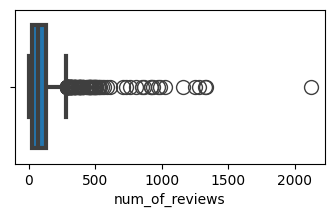

In [39]:
# reviso outliers en num_of_reviews
plt.figure(figsize=(4, 2))
sns.boxplot(x = 'num_of_reviews', data = df_mt_pizza_CANV_sindup,
            fliersize = 10, # Outlier size
            linewidth = 3,  # Lines width
            saturation = 0.95) # Fill color saturation

In [ ]:
# algunos tienen mas de 1000 reviews
df_mt_pizza_CANV_sindup[df_mt_pizza_CANV_sindup['num_of_reviews'] > 1000]

,gmap_id,business_name,address,city,state,zip_code,latitude,longitude,avg_rating,num_of_reviews
2438176,0x808fb65c53fe1b4d:0xf144efcbfc01ee56,Fibbar MaGees,"156 S Murphy Ave, Sunnyvale",CA 94086,United,States,37.376679,-122.030059,4.3,1163
2473348,0x809051a098fd8f43:0x10c4fc52449cc61e,John's Incredible Pizza - Modesto,"2225 Plaza Pkwy, Modesto",CA 95350,United,States,37.673175,-121.038869,3.9,1283
2624239,0x80c2b0ad19f16b83:0xb21c4b0b9d7e5c23,Shakey's Pizza Parlor,"5604 Sepulveda Blvd, Culver City",CA 90230,United,States,33.990042,-118.394910,4.2,1334
2634070,0x808fcaef535c5d1b:0x84b1d6b2d564f5dd,A Slice of New York,"3443 Stevens Creek Blvd, San Jose",CA 95117,United,States,37.323503,-121.959006,4.7,1248
2639269,0x80d954e46f14e4a1:0xaae07458e17e9135,Pizzeria Luigi,"2121 El Cajon Blvd, San Diego",CA 92104,United,States,32.754998,-117.142013,4.6,1026
2639712,0x80c2ca8349288235:0x57819f208c751481,The Original Giuliano's Delicatessen in Gardena,"1138 W Gardena Blvd, Gardena",CA 90247,United,States,33.881238,-118.294699,4.8,2120
2737189,0x80c8c43b8c86f9b1:0xcdfa5bc101c4f42,Flour & Barley,"3545 South Las Vegas Boulevard #L - 25, Las Vegas",NV 89109,United,States,36.117376,-115.170338,4.3,1323


Tiene casi el doble reviews que el segundo pero podría ser un valor válido. </br>
Reviso si la latitud y longitud son correctas

In [42]:
# pip install geopy
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

In [43]:
# Initialize geocoder
geolocator = Nominatim(user_agent="geo_checker")

# Function to get latitude & longitude from full address
def get_lat_long(address, city, state, zip_code):
    full_address = f"{address}, {city}, {state} {zip_code}"
    try:
        location = geolocator.geocode(full_address, timeout=10)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except GeocoderTimedOut:
        return None, None

In [44]:
# Apply the function to fetch verified coordinates
df_mt_pizza_CANV_sindup[['verified_latitude', 'verified_longitude']] = df_mt_pizza_CANV_sindup.apply(
    lambda row: pd.Series(get_lat_long(row['address'], row['city'], row['state'], row['zip_code'])), axis=1
)


In [45]:
# Compare the existing vs verified coordinates
df_mt_pizza_CANV_sindup['lat_diff'] = abs(df_mt_pizza_CANV_sindup['latitude'] - df_mt_pizza_CANV_sindup['verified_latitude'])
df_mt_pizza_CANV_sindup['long_diff'] = abs(df_mt_pizza_CANV_sindup['longitude'] - df_mt_pizza_CANV_sindup['verified_longitude'])

In [46]:
# Check rows where the difference is significant (e.g., > 0.01 degrees)
incorrect_coords = df_mt_pizza_CANV_sindup[(df_mt_pizza_CANV_sindup['lat_diff'] > 0.01) | (df_mt_pizza_CANV_sindup['long_diff'] > 0.01)]

# Display incorrect rows
print(incorrect_coords[['address', 'city', 'state', 'zip_code', 
                        'latitude', 'longitude', 'verified_latitude', 'verified_longitude', 
                        'lat_diff', 'long_diff']])

                       address             city state zip_code   latitude  \
70350         2721 Wildwood Rd         Wildwood    CA    96076  40.402172   
101599              8230 US-50   Silver Springs    NV    89429  39.365711   
141241      12911 Victory Blvd  North Hollywood    CA    91606  34.187212   
157088     9045 Fair Oaks Blvd       Carmichael    CA    95608  38.636940   
208588           1129 Olive Dr      Bakersfield    CA    93308  35.411282   
...                        ...              ...   ...      ...        ...   
3001397  3120-H, Santa Rita Rd       Pleasanton    CA    94566  37.690366   
3005788      1139 E Alosta Ave            Azusa    CA    91702  34.129470   
3006693          2130 Birch Rd      Chula Vista    CA    91915  32.621270   
3008782          2858 Niles St      Bakersfield    CA    93306  35.376425   
3012797       703 E Bidwell St           Folsom    CA    95630  38.671238   

          longitude  verified_latitude  verified_longitude  lat_diff  \
703

In [47]:
df_mt_pizza_CANV_sindup['lat_diff'] = abs(df_mt_pizza_CANV_sindup['latitude'] - df_mt_pizza_CANV_sindup['verified_latitude'])

In [49]:
# guardo df_mt_pizza_NJNY_sindup
df_mt_pizza_CANV_sindup.to_parquet(r'C:\Users\gonza\OneDrive\Desktop\Proyecto Grupal Henry\Maps\df_mt_pizza_CANV_sindup_verif_coord.parquet' , engine='fastparquet')

In [50]:
# reemplazo las latitudes por las correctas
df_mt_pizza_CANV_sindup['latitude'] = df_mt_pizza_CANV_sindup.apply(lambda x: x['verified_latitude'] if x['lat_diff'] > 0.01 else x['latitude'], axis=1)

In [51]:
# reemplazo las longitudes por las correctas
df_mt_pizza_CANV_sindup['longitude'] = df_mt_pizza_CANV_sindup.apply(lambda x: x['verified_longitude'] if x['long_diff'] > 0.01 else x['longitude'], axis=1)

In [52]:
# elimino las columnas intermedias
df_mt_pizza_CANV_sindup.drop(columns=['verified_latitude', 'verified_longitude', 'lat_diff', 'long_diff'], inplace=True)

In [53]:
df_mt_pizza_CANV_sindup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2395 entries, 6738 to 3023082
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gmap_id         2395 non-null   object 
 1   business_name   2395 non-null   object 
 2   address         2387 non-null   object 
 3   city            2395 non-null   object 
 4   state           2395 non-null   object 
 5   zip_code        2395 non-null   object 
 6   latitude        2395 non-null   float64
 7   longitude       2395 non-null   float64
 8   avg_rating      2395 non-null   float64
 9   num_of_reviews  2395 non-null   int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 205.8+ KB


In [ ]:
# guardo df_mt_pizza_CANV final 202502081554
df_mt_pizza_CANV_sindup.to_parquet(r'C:\Users\gonza\OneDrive\Desktop\Proyecto Grupal Henry\Maps\df_mt_pizza_CANV_sindup_verif_coord.parquet' , engine='fastparquet')